PROYECTO DE BI PARA ESCUELA DEPORTIVA, TABLA CLASE

PAQUETES E IMPORTACIONES A UTILIZAR

In [1]:
#crear entorno virtual en la carpeta del proyecto:
# python -m venv env o mi_entorno
# env/Script/Activate         para activar el entorno virtual en windows
# source env/bin/activate     para activar en linux
#instalar las siguientes librerias

#desactivar / deactivate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #pip install scikit-learn


Cargar los datos

In [30]:
data = pd.read_csv('data/datos_sinprocesar/clase_202510042015.csv')

Visualizar los datos

In [3]:
data.head()

,id_clase,nombre_clase,docente_id
0,1,Voleibol,364
1,2,Fútbol,488
2,3,YxxWyJ HKGD,917
3,4,Fútbol,534
4,5,qPEOlnzKWNl,252


Verificar la estructura de los datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_clase      1000 non-null   int64 
 1   nombre_clase  905 non-null    object
 2   docente_id    1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


Estadistico

In [5]:
data.describe()

,id_clase,docente_id
count,1000.000000,1000.000000
mean,500.500000,516.774000
std,288.819436,286.357765
min,1.000000,1.000000
25%,250.750000,268.500000
50%,500.500000,522.500000
75%,750.250000,766.000000
max,1000.000000,1000.000000


Estadistica de Campos Categoricos

In [6]:
data.describe(include='O')

,nombre_clase
count,905
unique,265
top,Fútbol
freq,236


Visualizar el tamaño del dataset (dataframe)

In [7]:
data.shape

(1000, 3)

OUTLIERS - Modo Grafico

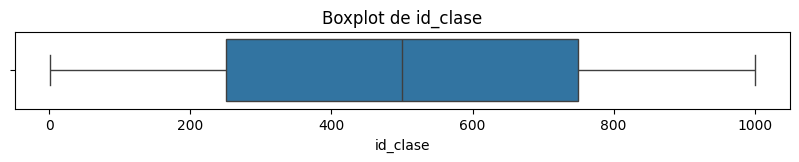

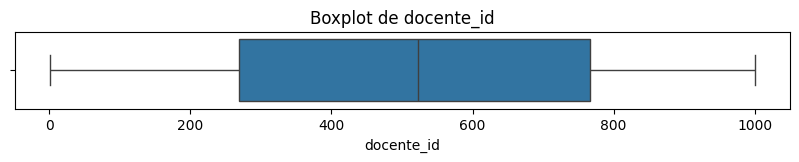

In [8]:
cols = data.select_dtypes(include=['number']).columns
for col in cols:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data[cols], x=col)
    #sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

OUTLIERS - Calculado

rango intercuartilico IRQ

In [9]:
outliers = {}

for col in cols:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1  # Rango Intercuartílico

    LI = Q1 - 1.5 * IQR  # Límite inferior
    LS = Q3 + 1.5 * IQR  # Límite superior

    outliers_col = data[(data[col] < LI) | (data[col] > LS)][col]
    outliers[col] = outliers_col

    print(f'{col}: {len(outliers_col)} outliers')
    print(f'  Límites: [{LI:.2f}, {LS:.2f}]')
    print(f'  Min: {data[col].min()}, Max: {data[col].max()}')
    print('-' * 40)

id_clase: 0 outliers
  Límites: [-498.50, 1499.50]
  Min: 1, Max: 1000
----------------------------------------
docente_id: 0 outliers
  Límites: [-477.75, 1512.25]
  Min: 1, Max: 1000
----------------------------------------


STR

In [10]:
outliers={}
for col in cols:
  mean=data[col].mean()
  std=data[col].std()

  outliers[col] = (data[col] > (mean + 3 *std)).sum() + (data[col] < (mean - 3 *std)).sum()

print(outliers)

{'id_clase': np.int64(0), 'docente_id': np.int64(0)}


Histogramas - Outliers

<Axes: xlabel='id_clase', ylabel='Count'>

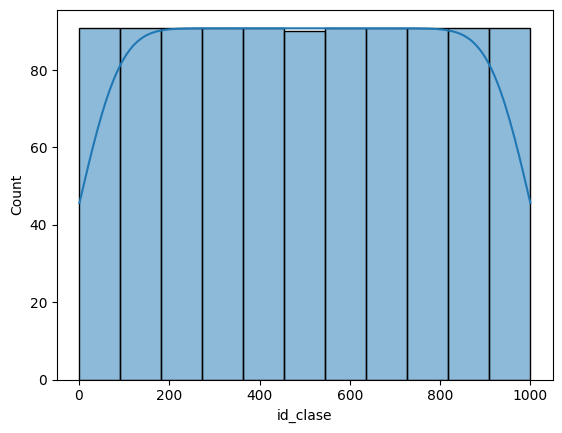

In [11]:
sns.histplot(data=data, x='id_clase', kde=True)

Valores Nulos

In [12]:
data.isna().mean()*100

id_clase        0.0
nombre_clase    9.5
docente_id      0.0
dtype: float64

Eliminar valores Nulos

In [31]:
# Eliminar filas con valores nulos en la columna y filas donde el nombre esta vacio (cadena vacia o solo espacios)
data = data[data['nombre_clase'].notna() & (data['nombre_clase'] != '')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 997
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_clase      905 non-null    int64 
 1   nombre_clase  905 non-null    object
 2   docente_id    905 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 28.3+ KB


Eliminar datos inconsistentes

In [32]:
import unicodedata


def normalizar(texto):
    if pd.isna(texto):
        return ''
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8').lower().strip()

data = data[
    data['nombre_clase'].notna() &
    data['nombre_clase'].apply(normalizar).isin(['futbol', 'baloncesto', 'voleibol'])
]


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 0 to 995
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_clase      643 non-null    int64 
 1   nombre_clase  643 non-null    object
 2   docente_id    643 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.1+ KB


Guardar data limpia de valores nulos eliminados

In [34]:
data.to_csv('data/datos_preprocesados/clase.csv', index=False)

Limpieza relacional

In [36]:
docente = pd.read_csv('data/datos_procesador/docente_limpio.csv')


In [38]:
clase = pd.read_csv('data/datos_preprocesados/clase.csv')

In [44]:
ids_clase_validos = docente['id_docente'].unique()
clase = clase[clase['docente_id'].isin(ids_clase_validos)]


In [47]:

print('Filas finales en clase:', clase.shape[0])
print('IDs únicos en docente:', docente['id_docente'].nunique())
print('IDs únicos en clase:', clase['docente_id'].nunique())


Filas finales en clase: 196
IDs únicos en docente: 134
IDs únicos en clase: 134


Guardar datos

In [48]:
clase.to_csv('data/datos_procesador/clase_limpia.csv', index=False)